<a href="https://colab.research.google.com/github/Monalika-P/DeepLearning-Notebooks/blob/master/Autoencoders/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autoencoders are unsupervised machine learning techniques.Here, the neural networks are levered for the task of representation learning.

Uses:

*   Dimentionality reduction
*   Image reconstruction
*   Image compression
*   Image denoising
*   Recommendation system





In [21]:
'''
  @ Monalika P
  Auto Encoders
'''
#Importing the libararies
import numpy as np
import tensorflow as tf
import keras

Using TensorFlow backend.


In [22]:
from keras.layers import Input, Dense
from keras.models import Model

In [23]:
# The size of our encoded representations
encoding_dim = 32

In [24]:
# This is our input placeholder
input_img = Input(shape=(784,))

In [25]:
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

In [26]:
# "decoded" is the lossy reconstruction of the input
decoded = Dense( 784, activation='sigmoid')(encoded)

In [27]:
#This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

 Creating a separate encoder and a decoder model

In [28]:
# This model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [29]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

In [30]:
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# -1 is user for retival of the last layer which basically contains the output

In [31]:
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

Compiling the model

In [32]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
#Importing the dataset
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

In [34]:
#Normalizing the dataset
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [35]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


Training the model

In [36]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.3554 - accuracy: 0.7571 - val_loss: 0.2709 - val_accuracy: 0.7948
Epoch 2/50
60000/60000 [==============================] - 2s 42us/step - loss: 0.2634 - accuracy: 0.7973 - val_loss: 0.2523 - val_accuracy: 0.7974
Epoch 3/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.2417 - accuracy: 0.7974 - val_loss: 0.2290 - val_accuracy: 0.7963
Epoch 4/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.2213 - accuracy: 0.7975 - val_loss: 0.2114 - val_accuracy: 0.7969
Epoch 5/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.2065 - accuracy: 0.7984 - val_loss: 0.1990 - val_accuracy: 0.7988
Epoch 6/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.1956 - accuracy: 0.7996 - val_loss: 0.1894 - val_accuracy: 0.7998
Epoch 7/50
60000/60000 [==============================] - 3s 43us/st

In [37]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

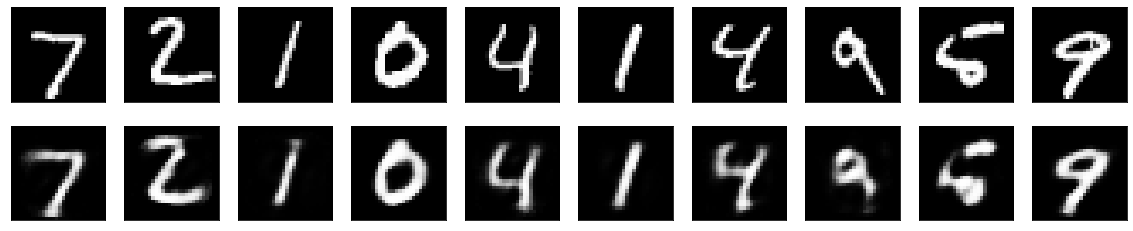

In [38]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()